# 布朗語料庫 (Brown Corpus)
**含 15667 個段落、57340 句、1161192 字** <br>
**下載：nltk.download('brown')** <br>
- words(): 單字串列 (list of str) <br>
- sents(): 已分詞好的句子串列 (list of (list of str))  <br>
- paras(): 已分詞好的句子串列的段落串列（list of (list of (list of str)) <br>
- tagged_words(): 已詞性標註的單字串列 (list of (str,str) tuple) <br>
- tagged_sents(): 已詞性標註的單次串列的句子串列 (list of (list of (str,str))) <br>
- tagged_paras(): 已詞性標註的單次串列的句子串列的段落串列 (list of (list of (list of (str,str)))) <br>
- raw(): 未處理原始文本（unprocessed corpus contents） <br>

**nltk.corpus 說明文件：https://www.nltk.org/api/nltk.corpus.html** <br>
**詞性標註列表說明可參考：https://en.wikipedia.org/wiki/Brown_Corpus**

In [1]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     /Users/prestonyu9011/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [2]:
from nltk.corpus import brown
sents = brown.sents()
print(sents)

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]


# 詞頻分析 - 齊夫定律（Zipf's Law）
Reference: https://zh.wikipedia.org/wiki/齊夫定律

### 句子開頭大寫還原、詞形還原

In [3]:
def pattern_match(ngram):
    import re
    pattern = "[a-zA-Z][a-zA-Z-]+|[a-zA-Z-]+'s"
    match = True
    for gram in ngram:
        if(re.match(pattern, gram)==None):
            match = False
            break
    return match

In [4]:
def Lemmatizer(tagged_word):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer() 
    
    if(tagged_word[1][:2]!='NP'): 
        if(tagged_word[1][:2]=='NN'): #一般名詞
            return lemmatizer.lemmatize(tagged_word[0].lower(), pos='n')
        elif(tagged_word[1][:2]=='VB'): #動詞
            return lemmatizer.lemmatize(tagged_word[0].lower(), pos='v')
        elif(tagged_word[1][:2]=='JJ'): #形容詞
            return lemmatizer.lemmatize(tagged_word[0].lower(), pos='a')
        else:
            return tagged_word[0].lower()
    else: #專有名詞
        return tagged_word[0]

In [5]:
word_count = dict()
for tagged_word in brown.tagged_words():
    word = Lemmatizer(tagged_word)
    if(pattern_match([word])):
        if(word not in word_count.keys()):
            word_count.update({word:1})
        else:
            word_count.update({word:word_count[word]+1})

### 詞頻排序

In [6]:
words_rank = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)}

In [7]:
words_rank

{'the': 69971,
 'of': 36412,
 'and': 28853,
 'to': 26158,
 'in': 21337,
 'that': 10594,
 'is': 10109,
 'was': 9815,
 'he': 9548,
 'for': 9489,
 'it': 8760,
 'with': 7289,
 'as': 7258,
 'his': 6996,
 'on': 6741,
 'be': 6377,
 'at': 5372,
 'by': 5306,
 'this': 5145,
 'had': 5133,
 'not': 4610,
 'are': 4394,
 'but': 4381,
 'from': 4370,
 'or': 4206,
 'have': 3942,
 'an': 3740,
 'they': 3620,
 'which': 3561,
 'one': 3408,
 'you': 3286,
 'were': 3284,
 'her': 3036,
 'all': 3001,
 'she': 2860,
 'say': 2778,
 'there': 2728,
 'would': 2714,
 'their': 2669,
 'we': 2652,
 'him': 2619,
 'been': 2472,
 'has': 2437,
 'when': 2331,
 'make': 2319,
 'who': 2252,
 'will': 2248,
 'more': 2209,
 'if': 2198,
 'no': 2141,
 'out': 2129,
 'so': 1985,
 'time': 1909,
 'what': 1908,
 'up': 1892,
 'its': 1858,
 'do': 1836,
 'about': 1815,
 'go': 1813,
 'into': 1791,
 'than': 1790,
 'can': 1789,
 'them': 1788,
 'only': 1748,
 'other': 1702,
 'new': 1670,
 'some': 1618,
 'year': 1607,
 'could': 1601,
 'take': 1573

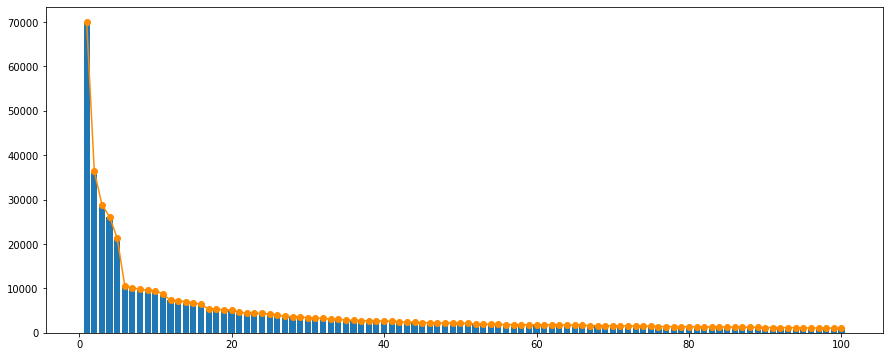

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.bar([i+1 for i in range(len(words_rank))][:100], list(words_rank.values())[:100])
plt.plot([i+1 for i in range(len(words_rank))][:100], list(words_rank.values())[:100], '-o', color='darkorange')
plt.show()

### 詞頻累計

In [9]:
cumulative_freq = []
freq_sum = 0
for value in words_rank.values():
    freq_sum += value
    cumulative_freq.append(freq_sum)

In [10]:
cumulative_freq

[69971,
 106383,
 135236,
 161394,
 182731,
 193325,
 203434,
 213249,
 222797,
 232286,
 241046,
 248335,
 255593,
 262589,
 269330,
 275707,
 281079,
 286385,
 291530,
 296663,
 301273,
 305667,
 310048,
 314418,
 318624,
 322566,
 326306,
 329926,
 333487,
 336895,
 340181,
 343465,
 346501,
 349502,
 352362,
 355140,
 357868,
 360582,
 363251,
 365903,
 368522,
 370994,
 373431,
 375762,
 378081,
 380333,
 382581,
 384790,
 386988,
 389129,
 391258,
 393243,
 395152,
 397060,
 398952,
 400810,
 402646,
 404461,
 406274,
 408065,
 409855,
 411644,
 413432,
 415180,
 416882,
 418552,
 420170,
 421777,
 423378,
 424951,
 426524,
 428074,
 429585,
 431060,
 432532,
 433946,
 435326,
 436703,
 438076,
 439437,
 440781,
 442097,
 443411,
 444715,
 446018,
 447276,
 448528,
 449764,
 450986,
 452167,
 453341,
 454513,
 455683,
 456842,
 457943,
 459012,
 460081,
 461140,
 462184,
 463221,
 464256,
 465286,
 466302,
 467316,
 468327,
 469337,
 470333,
 471308,
 472279,
 473220,
 474157,
 4

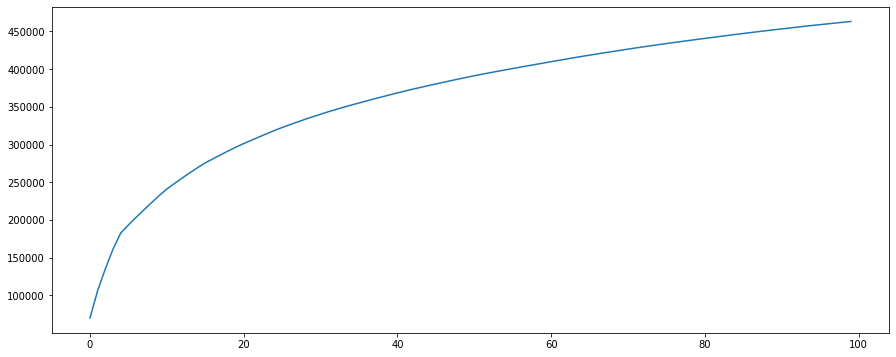

In [11]:
plt.figure(figsize=(15,6))
plt.plot([i for i in range(100)], cumulative_freq[:100])
plt.show()

### 齊夫定律

In [12]:
mul_list = []
freq = list(words_rank.values())
for i in range(len(words_rank)):
    mul_list.append((i+1) * freq[i])

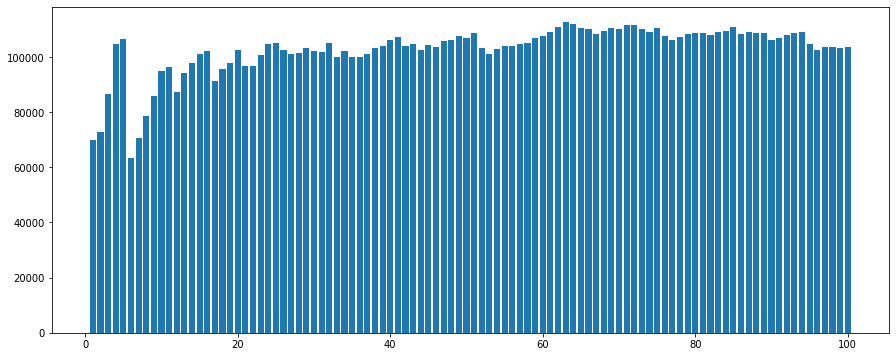

In [13]:
plt.figure(figsize=(15,6))
plt.bar([i+1 for i in range(100)], list(mul_list)[:100])
plt.show()

r, f(r) 同取 log

In [14]:
import math
x = []
y = []
freq = list(words_rank.values())

for i in range(len(words_rank)):
    x.append(math.log(i+1))
    y.append(math.log(freq[i]))

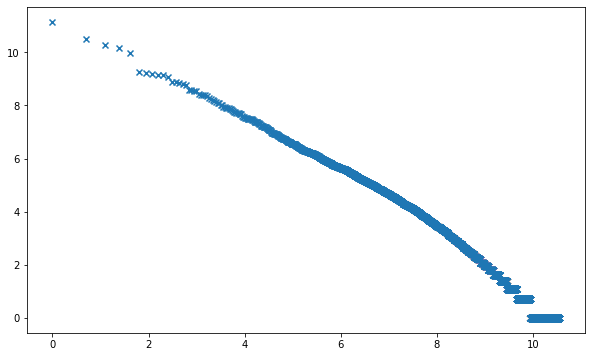

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(x, y,  color='#1f77b4', marker = 'x')

### 直線方程式

**全部詞頻排序（38083個）**

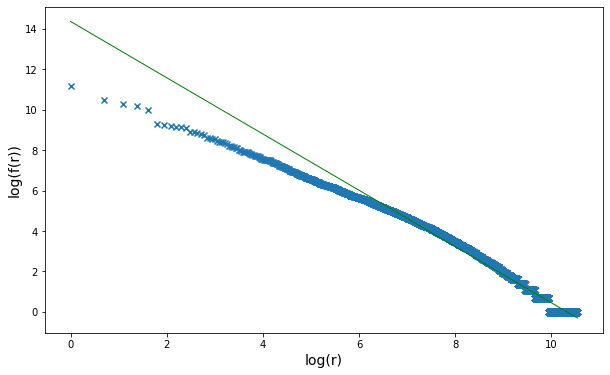

方程式: log(f(r)) = -1.3907266140367267 * log(r) + 14.36159857634851
R^2: 0.9751775534179604


In [16]:
import numpy as np
from sklearn import linear_model

X = np.array(x).reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(X, y)

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='#1f77b4', marker = 'x')
plt.plot(x, regr.predict(X), color='green', linewidth=1)
plt.ylabel('log(f(r))', size=14)
plt.xlabel('log(r)', size=14)
plt.show()

print('方程式:', 'log(f(r)) =' , regr.coef_[0] , '* log(r) +' , regr.intercept_)
print("R^2:", regr.score(X, y))

**排序倒數10000個**

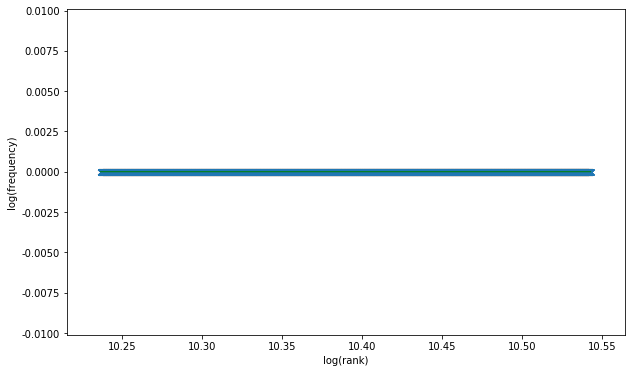

方程式: log(f(r)) = 0.0 * log(r) + 0.0
R^2: 1.0


In [17]:
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

X = np.array(x[-10000:]).reshape(-1, 1)
y_last = y[-10000:]

regr = linear_model.LinearRegression()
regr.fit(X, y_last)

plt.figure(figsize=(10,6))
plt.scatter(X, y_last, color='#1f77b4', marker = 'x')
plt.plot(X, regr.predict(X), color='green', linewidth=1)
plt.ylabel('log(frequency)')
plt.xlabel('log(rank)')
plt.show()

print('方程式:', 'log(f(r)) =' , regr.coef_[0] , '* log(r) +' , regr.intercept_)
print("R^2:", regr.score(X, y_last))

**詞頻排序前1000個**

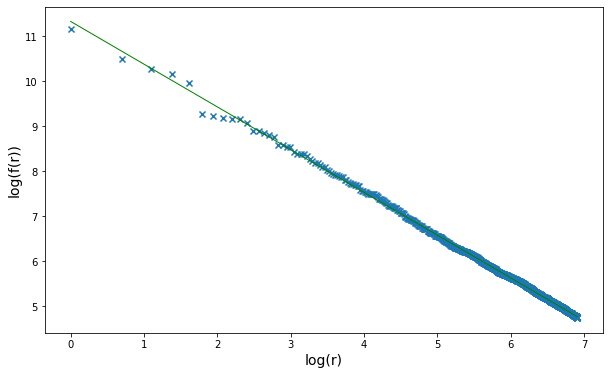

方程式: log(f(r)) = -0.9504143835864586 * log(r) + 11.332086948164937
R^2: 0.9990839016830436


In [18]:
X = np.array(x[:1000]).reshape(-1, 1)
y_first = y[:1000]

regr = linear_model.LinearRegression()
regr.fit(X, y_first)

plt.figure(figsize=(10,6))
plt.scatter(X, y_first, color='#1f77b4', marker = 'x')
plt.plot(X, regr.predict(X), color='green', linewidth=1)
plt.ylabel('log(f(r))', size=14)
plt.xlabel('log(r)', size=14)
plt.show()

print('方程式:', 'log(f(r)) =' , regr.coef_[0] , '* log(r) +' , regr.intercept_)
print("R^2:", regr.score(X, y_first))